# Tutorial on how to interpret/use the results produced by CPN algorithm

In [1]:
import pickle
# from ctypes import pythonapi
from encoder_decoder import *
import numpy as np
import matplotlib.pyplot as plt

#### Toy example

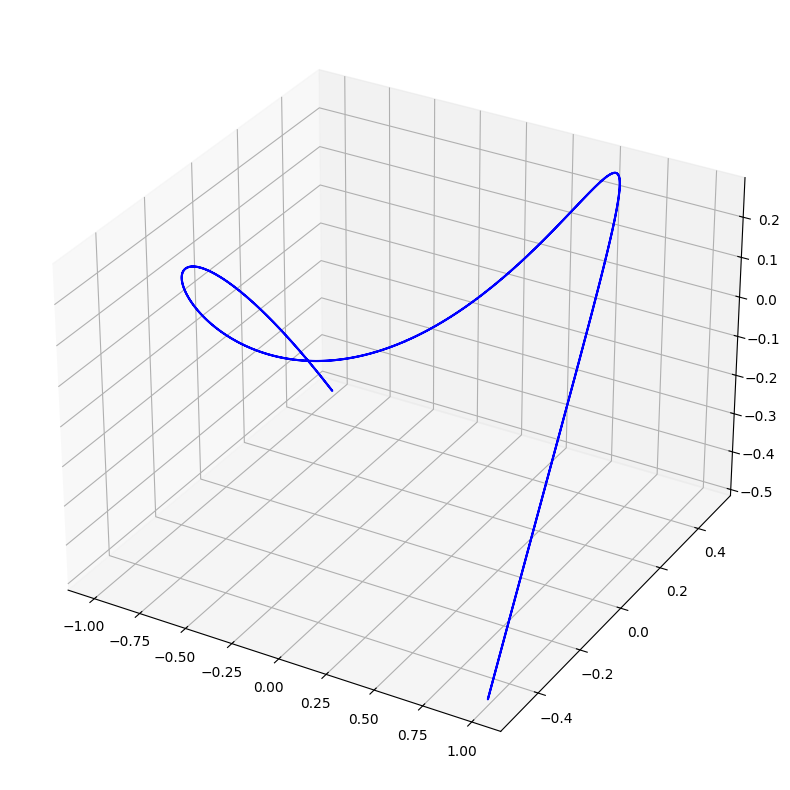

In [2]:
num_snapshots = 500
x = np.linspace(0, 2*np.pi, num_snapshots)
S = np.reshape([np.sin(x), np.sin(3*x)/2, (np.sin(3*x)/2)*np.sin(x)], (3, num_snapshots))

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.plot3D(S[0], S[1], S[2], 'blue')
plt.show()

np.save("Toy_data/data.npy", S)

We train a CPN with $\epsilon=10^{-10}$ and $p=3$.

Training data shape  =   (3, 500)
Test data shape   =   (3, 500)
Computing SVD...
SVD truncation...
V_N shape=  (3, 3)
A_N shape=  (3, 500)
n min     =    1
#################################################################step1
[ 1 ... 1 ] |-> 2
Rest to learn =  1
#################################################################step2
[ 1 ... 2 ] |-> 3
Rest to learn =  0
Done !	 Dimension of the manifold =  1
I =  [1]
A_n shape =  (1, 500)
time =  2.548258041999361  secs
Decoder lipschitz const =  6.800156087620876
# ----------------- MEAN-SQUARED SETTING ----------------- #
Linear reconstruction training error =  0.5222329678670936
Linear reconstruction test error =  0.5222329678670936
Nonlinear reconstruction training error =  4.3424275897861335e-16
Nonlinear reconstruction test error =  4.3424275897861335e-16


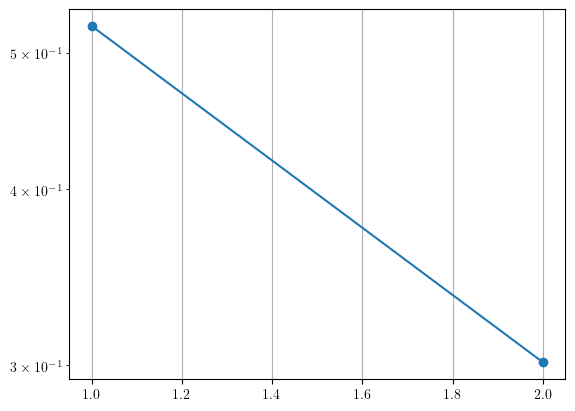

In [3]:
%run CPN_MOR.py --config_path configs/cpn.yaml --mode train

V_N contains the basis vectors needed to reach the desired precision, and A_N contains the coefficients $(a_i)_{1 \le i \le N}$. So, the print here indicates that to reach the target precision, we need (all) 3 basis vectors $[\varphi_1, \varphi_2, \varphi_3]$ given by the SVD, and coefficients $(a_1, a_2, a_3)$.

"n min" represents the initial dimension (number of input coefficients) at the first step of the algorithm. It is set in the config file, or depends on the variable "tol_min" set in the config file.

$[1...1] \rightarrow 2$ indicates that $a_2$ was learnt as a function of $a_1$

$[1...2] \rightarrow 3$ indicates that $a_3$ was learnt as a function of 2 coefficients (in this case $(a_1, g_2(a_1))$).

I contains indices of coefficients that were used as inputs (only $a_1$ here) and card(I) = n.

The linear errors (train and test) give the projection error on the small linear space $X_n$ (which is the space spanned by $\varphi_1$ in this example).

The nonlinear errors are reconstruction errors given by CPN.



# Results file

The results file contains :
  - txt files with parameters and results information.
  - a png file of the singular value decay
  - a npy file with left singular vectors given by SVD on the centered snapshot matrix.
  - #### The encoder file
    The encoder file contains different information on the encoder...
    Below is detailed how to use the encoder file.

Load the encoder file

In [4]:
with open("Results/Encoder.pkl", "rb") as f:
    E = pickle.load(f)

From a matrix S, get the encoding coefficients of the centered matrix S - S_ref (S_ref is the reference matrix and was constructed in our algorithm by taking the mean over each column of the training matrix)

In [5]:
E.u_ref

array([5.68434189e-17, 7.10542736e-18, 4.44089210e-18])

In [6]:
E(S)

array([[ 5.68434189e-17, -1.25912210e-02, -2.51804457e-02,
        -3.77656782e-02, -5.03449231e-02, -6.29161861e-02,
        -7.54774740e-02, -8.80267954e-02, -1.00562160e-01,
        -1.13081582e-01, -1.25583075e-01, -1.38064657e-01,
        -1.50524350e-01, -1.62960178e-01, -1.75370170e-01,
        -1.87752357e-01, -2.00104777e-01, -2.12425471e-01,
        -2.24712487e-01, -2.36963875e-01, -2.49177694e-01,
        -2.61352007e-01, -2.73484884e-01, -2.85574401e-01,
        -2.97618642e-01, -3.09615697e-01, -3.21563664e-01,
        -3.33460648e-01, -3.45304764e-01, -3.57094133e-01,
        -3.68826887e-01, -3.80501166e-01, -3.92115117e-01,
        -4.03666901e-01, -4.15154685e-01, -4.26576649e-01,
        -4.37930980e-01, -4.49215880e-01, -4.60429559e-01,
        -4.71570240e-01, -4.82636155e-01, -4.93625550e-01,
        -5.04536683e-01, -5.15367825e-01, -5.26117258e-01,
        -5.36783277e-01, -5.47364192e-01, -5.57858325e-01,
        -5.68264012e-01, -5.78579603e-01, -5.88803464e-0

Get the basis vectors of the linear part (only $\varphi_1$ in the toy example).

In [7]:
E.basis

array([[-1.00000000e+00],
       [-1.30516479e-17],
       [-2.66896271e-17]])

Get the index I (indices of the linear part, i.e coefficients used as input to learn the functions $g_i$. The indices start at 0, i.e the first coefficient $a_1$ is indexed by 0, $a_2$ is indexed by 1, etc...)

In [8]:
E.index

array([0])

- #### The decoder file
    The decoder file contains different information on the decoder...
    Below is detailed how to use the decoder file.

Load the decoder file

In [9]:
with open("Results/Decoder.pkl", "rb") as f:
    D = pickle.load(f)

Reference solution

In [10]:
D.u_ref

array([5.68434189e-17, 7.10542736e-18, 4.44089210e-18])

Get the indices of the linear part (equivalent to E.index)

In [11]:
D.linear_index

array([0])

Get the indices of the nonlinear part

In [12]:
D.nonlinear_index

array([1, 2])

Get the vector basis of the linear part (equivalent to E.basis)

In [13]:
D.linear_basis

array([[-1.00000000e+00],
       [-1.30516479e-17],
       [-2.66896271e-17]])

Get the basis vectors of the nonlinear part

In [14]:
D.nonlinear_basis

array([[ 1.30516479e-17, -2.66896271e-17],
       [-1.00000000e+00, -7.69427887e-17],
       [ 1.74171807e-34,  1.00000000e+00]])

Get a dictionary with information on the functions $f_i$ (for reminder, $g_i(a) = f_i(a, (g_j(a))_{n <j <n_i)})$

 - The indices start at 0, so "coef1" represents $a_2$ and "coef2" $a_3$...
 - "function" is a tensap object containing the function $f_i$.
 - "nb_deps" represents the number of inputs used to learn the coefficient.

In the example, the dictionary tells that coefficient $a_2$ was learnt using 1 input ($a_1$), and $a_3$ was learnt using 2 inputs ($a_1$ and $g_2(a_1)$).

In [15]:
D.functions_f

{'coef1': {'function': <tensap.approximation.bases.functional_basis_array.FunctionalBasisArray at 0x119711d30>,
  'index': 1,
  'nb_deps': 1,
  'lip_constant': np.float64(4.499702730432377)},
 'coef2': {'function': <tensap.approximation.bases.functional_basis_array.FunctionalBasisArray at 0x11e17f230>,
  'index': 2,
  'nb_deps': 2,
  'lip_constant': np.float64(4.999479788312647)}}

Evaluate the functions $g_i$

The decoder D contains a function "functions_g" used to evaluate the functions $g_i$ for a given value. "functions_g" takes as input an index to specify the function to evaluate (e.g : index=1 to evaluate $g_2$ ) and an array.

If the index $i$ is in the set I (linear part), $g_i(a) = a_i$.


In [16]:
# Compute coefficients a
a = E(S)

In [17]:
# Evaluate g_1(a) : g_1(a) = a_1
D.functions_g(0, a)

array([[ 5.68434189e-17, -1.25912210e-02, -2.51804457e-02,
        -3.77656782e-02, -5.03449231e-02, -6.29161861e-02,
        -7.54774740e-02, -8.80267954e-02, -1.00562160e-01,
        -1.13081582e-01, -1.25583075e-01, -1.38064657e-01,
        -1.50524350e-01, -1.62960178e-01, -1.75370170e-01,
        -1.87752357e-01, -2.00104777e-01, -2.12425471e-01,
        -2.24712487e-01, -2.36963875e-01, -2.49177694e-01,
        -2.61352007e-01, -2.73484884e-01, -2.85574401e-01,
        -2.97618642e-01, -3.09615697e-01, -3.21563664e-01,
        -3.33460648e-01, -3.45304764e-01, -3.57094133e-01,
        -3.68826887e-01, -3.80501166e-01, -3.92115117e-01,
        -4.03666901e-01, -4.15154685e-01, -4.26576649e-01,
        -4.37930980e-01, -4.49215880e-01, -4.60429559e-01,
        -4.71570240e-01, -4.82636155e-01, -4.93625550e-01,
        -5.04536683e-01, -5.15367825e-01, -5.26117258e-01,
        -5.36783277e-01, -5.47364192e-01, -5.57858325e-01,
        -5.68264012e-01, -5.78579603e-01, -5.88803464e-0

In [18]:
# Evaluate g_2(a)
D.functions_g(1, a)

array([-8.12683254e-17, -1.88828391e-02, -3.77387370e-02, -5.65407910e-02,
       -7.52621751e-02, -9.38761784e-02, -1.12356243e-01, -1.30676004e-01,
       -1.48809321e-01, -1.66730324e-01, -1.84413444e-01, -2.01833450e-01,
       -2.18965490e-01, -2.35785120e-01, -2.52268342e-01, -2.68391638e-01,
       -2.84132006e-01, -2.99466986e-01, -3.14374701e-01, -3.28833880e-01,
       -3.42823893e-01, -3.56324780e-01, -3.69317279e-01, -3.81782853e-01,
       -3.93703716e-01, -4.05062860e-01, -4.15844079e-01, -4.26031989e-01,
       -4.35612056e-01, -4.44570612e-01, -4.52894874e-01, -4.60572966e-01,
       -4.67593932e-01, -4.73947757e-01, -4.79625374e-01, -4.84618683e-01,
       -4.88920560e-01, -4.92524867e-01, -4.95426461e-01, -4.97621203e-01,
       -4.99105961e-01, -4.99878617e-01, -4.99938069e-01, -4.99284231e-01,
       -4.97918037e-01, -4.95841435e-01, -4.93057390e-01, -4.89569871e-01,
       -4.85383857e-01, -4.80505318e-01, -4.74941216e-01, -4.68699489e-01,
       -4.61789043e-01, -

In [19]:
# Evaluate g_3(a)
D.functions_g(2, a)

array([ 2.89926104e-33,  2.37758000e-04,  9.50278219e-04,  2.13530132e-03,
        3.78906842e-03,  5.90633111e-03,  8.48036545e-03,  1.15029898e-02,
        1.49645868e-02,  1.88541288e-02,  2.31592073e-02,  2.78660662e-02,
        3.29596381e-02,  3.84235851e-02,  4.42403419e-02,  5.03911627e-02,
        5.68561717e-02,  6.36144158e-02,  7.06439209e-02,  7.79217505e-02,
        8.54240672e-02,  9.31261966e-02,  1.01002693e-01,  1.09027410e-01,
        1.17173565e-01,  1.25413820e-01,  1.33720345e-01,  1.42064903e-01,
        1.50418918e-01,  1.58753557e-01,  1.67039807e-01,  1.75248550e-01,
        1.83350650e-01,  1.91317022e-01,  1.99118721e-01,  2.06727014e-01,
        2.14113460e-01,  2.21249992e-01,  2.28108987e-01,  2.34663350e-01,
        2.40886582e-01,  2.46752857e-01,  2.52237095e-01,  2.57315028e-01,
        2.61963272e-01,  2.66159390e-01,  2.69881959e-01,  2.73110628e-01,
        2.75826178e-01,  2.78010577e-01,  2.79647033e-01,  2.80720047e-01,
        2.81215453e-01,  

If necessary, the functions $f_i$ can also be evaluated, but require to manually give the right values as input. For e.g, to evaluate $f_3$, we need to give as input $(a_1, g_2(a_1))$

In [20]:
# Evaluate f_2 : equivalent to D.functions_g(1, a)
D.functions_f["coef1"]["function"](a.T)

array([-8.12683254e-17, -1.88828391e-02, -3.77387370e-02, -5.65407910e-02,
       -7.52621751e-02, -9.38761784e-02, -1.12356243e-01, -1.30676004e-01,
       -1.48809321e-01, -1.66730324e-01, -1.84413444e-01, -2.01833450e-01,
       -2.18965490e-01, -2.35785120e-01, -2.52268342e-01, -2.68391638e-01,
       -2.84132006e-01, -2.99466986e-01, -3.14374701e-01, -3.28833880e-01,
       -3.42823893e-01, -3.56324780e-01, -3.69317279e-01, -3.81782853e-01,
       -3.93703716e-01, -4.05062860e-01, -4.15844079e-01, -4.26031989e-01,
       -4.35612056e-01, -4.44570612e-01, -4.52894874e-01, -4.60572966e-01,
       -4.67593932e-01, -4.73947757e-01, -4.79625374e-01, -4.84618683e-01,
       -4.88920560e-01, -4.92524867e-01, -4.95426461e-01, -4.97621203e-01,
       -4.99105961e-01, -4.99878617e-01, -4.99938069e-01, -4.99284231e-01,
       -4.97918037e-01, -4.95841435e-01, -4.93057390e-01, -4.89569871e-01,
       -4.85383857e-01, -4.80505318e-01, -4.74941216e-01, -4.68699489e-01,
       -4.61789043e-01, -

In [21]:
# Evaluate f_3 : equivalent to D.functions_g(2, a)
in_ = np.concatenate([a, D.functions_g(1, a)[None, :]], axis=0)

In [22]:
D.functions_f["coef2"]["function"](in_.T)

array([ 2.89926104e-33,  2.37758000e-04,  9.50278219e-04,  2.13530132e-03,
        3.78906842e-03,  5.90633111e-03,  8.48036545e-03,  1.15029898e-02,
        1.49645868e-02,  1.88541288e-02,  2.31592073e-02,  2.78660662e-02,
        3.29596381e-02,  3.84235851e-02,  4.42403419e-02,  5.03911627e-02,
        5.68561717e-02,  6.36144158e-02,  7.06439209e-02,  7.79217505e-02,
        8.54240672e-02,  9.31261966e-02,  1.01002693e-01,  1.09027410e-01,
        1.17173565e-01,  1.25413820e-01,  1.33720345e-01,  1.42064903e-01,
        1.50418918e-01,  1.58753557e-01,  1.67039807e-01,  1.75248550e-01,
        1.83350650e-01,  1.91317022e-01,  1.99118721e-01,  2.06727014e-01,
        2.14113460e-01,  2.21249992e-01,  2.28108987e-01,  2.34663350e-01,
        2.40886582e-01,  2.46752857e-01,  2.52237095e-01,  2.57315028e-01,
        2.61963272e-01,  2.66159390e-01,  2.69881959e-01,  2.73110628e-01,
        2.75826178e-01,  2.78010577e-01,  2.79647033e-01,  2.80720047e-01,
        2.81215453e-01,  

Evaluate the decoder at a given value

In [23]:
a = E(S)
D(a)

array([[-1.06068557e-33,  1.25912210e-02,  2.51804457e-02, ...,
        -2.51804457e-02, -1.25912210e-02, -2.44929360e-16],
       [ 8.83737528e-17,  1.88828391e-02,  3.77387370e-02, ...,
        -3.77387370e-02, -1.88828391e-02, -2.79020287e-16],
       [ 4.44089210e-18,  2.37758000e-04,  9.50278219e-04, ...,
         9.50278219e-04,  2.37758000e-04,  4.44089210e-18]],
      shape=(3, 500))

Evaluate the encoder-decoder for a given solution

In [24]:
S_approx = D(E(S))
S_approx

array([[-1.06068557e-33,  1.25912210e-02,  2.51804457e-02, ...,
        -2.51804457e-02, -1.25912210e-02, -2.44929360e-16],
       [ 8.83737528e-17,  1.88828391e-02,  3.77387370e-02, ...,
        -3.77387370e-02, -1.88828391e-02, -2.79020287e-16],
       [ 4.44089210e-18,  2.37758000e-04,  9.50278219e-04, ...,
         9.50278219e-04,  2.37758000e-04,  4.44089210e-18]],
      shape=(3, 500))

In [25]:
np.linalg.norm(S - S_approx, "fro") /  np.linalg.norm(S, "fro")

np.float64(4.3424275897861335e-16)